In [12]:
# create my corpus of sentences
corpus = ['I really like to go cycling.',
         'I wish I had a faster bike, but that is okay because cycling is so fun.',
         'My brother goes cycling too.',
         'My brother has a faster bike than me.']

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
#creating a count vector

# Instantiate the object and count the words
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(corpus)

# convert to dense vectors (leave out the zeros)
print(vectors.todense())

[[0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0]
 [1 1 0 1 1 1 1 0 0 1 0 2 0 0 0 1 0 1 0 1 0 0 1]
 [0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0]]


In [4]:
# creating a one-hot encoded word count
from sklearn.preprocessing import Binarizer

In [14]:
# Instantiate the object and get the word count
freq = CountVectorizer()
corpus_freq = freq.fit_transform(corpus)

In [15]:
# Initialize the binarizer and create the binary encoded vector
onehot = Binarizer()
corpus_onehot = onehot.fit_transform(corpus_freq.toarray())

# Display
corpus_onehot

array([[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0],
       [1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
        1],
       [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0],
       [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
        0]])

In [16]:
# could have skipped a step above
# same as above, saved some time

corpus_onehot_2 = onehot.fit_transform(vectors)
print(corpus_onehot_2.todense())

[[0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0]
 [1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1]
 [0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0]]


In [8]:
# term frequency inverwse document frequency tf-idf
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# Instantiate the object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

#create a vocab and get word counts per doc
dtm = tfidf.fit_transform(corpus)

#Get featrure names to use as df column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View
dtm.head()

,bike,brother,cycling,faster,fun,goes,like,okay,really,wish
0,0.000000,0.000000,0.411378,0.000000,0.000000,0.000000,0.644503,0.000000,0.644503,0.000000
1,0.365594,0.000000,0.295980,0.365594,0.463709,0.000000,0.000000,0.463709,0.000000,0.463709
2,0.000000,0.553492,0.448100,0.000000,0.000000,0.702035,0.000000,0.000000,0.000000,0.000000
3,0.577350,0.577350,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
# first open and read the file
my_file = open("news.txt", "r")
print(my_file.read())


WASHINGTON—Senate Republicans, facing a Democratic offensive, won enough of their Tuesday re-elections to diminish any chance that Democrats could pick up enough seats to take control of the Senate. 
Their political prospects brightened on Wednesday when GOP Sen. Susan Collins of Maine defeated Democrat Sara Gideon in her toughest re-election race. Her victory and that of Sen. Joni Ernst of Iowa 
minimized the party’s losses elsewhere and eased the way for a Republican majority to hold the chamber for two more years. With Democrats retaining control of the House, albeit with a slightly smaller 
majority, the U.S. will likely remain a divided government, an outcome that would serve as a check on the next president and attempts at sweeping legislative initiatives. “People are disappointed,”
said Rep. Debbie Dingell (D., Mich.). Democrats took solace in the high turnout among women, she added, but “we still have a challenge connecting with a lot of working men and women.”; 
We investigate

In [33]:

corpus = my_file.split(';')

# for i in [0, 1, 2]:
#     print('Document', i)
#     print(corpus[i][0:300])

AttributeError: '_io.TextIOWrapper' object has no attribute 'split'

In [35]:
# import PCA
from sklearn.decomposition import PCA

In [37]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [38]:
# define a function to find the vector for a word
def get_word_vectors(words):
    return [nlp(word).vector for word in words]

words = ['bike', 'skate', 'wheel', 'ball',
        'rider', 'driver', 'diver', 'swimmer',
        'fast', 'climb', 'run', 'skip']

# Initialize the PCA model and project down to two demensions
pca = PCA(n_components=2)

#Fit PCA model
pca.fit(get_word_vectors(words))

#APply the tranformation learned from the PCA model
word_vecs_2d = pca.transform(get_word_vectors(words))

word_vecs_2d

array([[-1.99549088,  0.81990097],
       [-0.49083884, -2.2135591 ],
       [-2.74332493,  2.09061406],
       [-1.12313944, -1.83272002],
       [ 0.60048558,  1.88731102],
       [-0.09937025,  5.15581135],
       [ 5.03006781,  0.69508886],
       [ 5.03508816, -1.06444853],
       [-1.2549999 , -0.88699889],
       [-0.78974002, -1.92846408],
       [-1.33345271, -1.12101953],
       [-0.83528457, -1.6015161 ]])

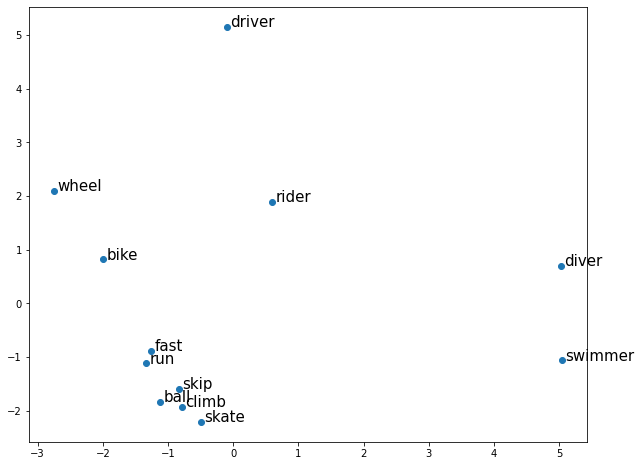

In [39]:
# Imports for plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# Display the text of the word at each point
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x+0.05, y, word, size= 15)

# show the plot
plt.show()